# Lab 2: Mine Crafting

Erika Falco ~ April 9, 2025

First, I will define my physical constants and import the needed libraries. 

In [1]:
# Constants
G = 6.6743 * 10**-11 #m^3/kg/s^2
g0 = 9.81 #m/s^2
M_earth = 5.972 * 10**24 #kg
M_moon = 7.35 * 10**22 #kg
R_earth = 6378.1 * 10**3 #m
D_earth = 2* R_earth #m
R_moon = 1738.1 *10**3 #m
w_earth = 7.272 * 10**-5 #rad/s -- rotation rate of earth about equator

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Part 1: The Ideal Case

We will calculate the time taken for a test mass to hit the bottom of a 4 km shaft assuming no drag and constant gravitational acceleration. First, we will solve this analytically with a kinematic equation. 

In [3]:
gamma = 2 
alpha = 0

def time_to_fall(h):
    return np.sqrt(2*h/g0) #seconds

t_fall = time_to_fall(4*10**3) #seconds
print(f"The test mass takes {t_fall} seconds to fall to the bottom of a 4 km shaft, assuming no drag and constant gravitational acceleration.")

The test mass takes 28.55686245854129 seconds to fall to the bottom of a 4 km shaft, assuming no drag and constant gravitational acceleration.


Now, we will solve the same problem using a system of differential equations. 

The test mass hits the bottom of the shaft at t = 28.556862458541275 seconds when ignoring air resistance and assuming a constant gravitational acceleration.


Solution:
   message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  2.843e+01  2.853e+01]
        y: [[ 0.000e+00 -4.915e-02 ... -3.964e+03 -3.992e+03]
            [ 0.000e+00 -9.820e-01 ... -2.789e+02 -2.799e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


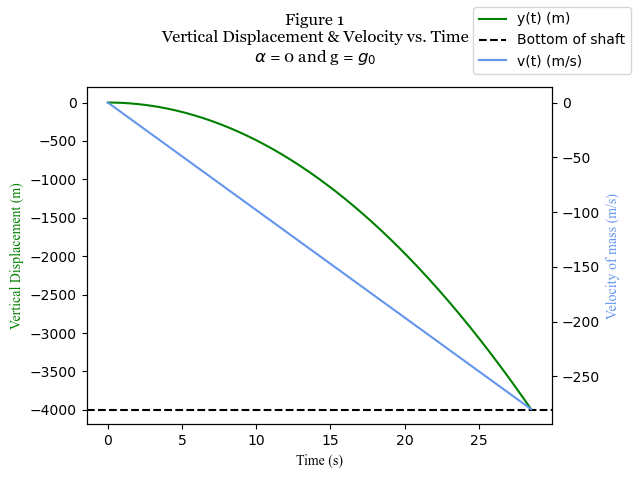

In [4]:
# Solving a system of differential equations 

# Define derivatives function 
def y_derivatives(t, s):
    y, v = s #m, m/s
    dydt = v #m/s
    d2ydt2 = -g0 + alpha * (np.abs(dydt)**gamma) #m/s^2
    derivs = [dydt, d2ydt2] # m/s, m/s^2
    return derivs

# Defining time span 
t0 = 0 #seconds
tf = 100 #seconds
t_eval = np.linspace(t0, tf, 1000) #seconds

# Define initial conditions 
ics = [0, 0] #m, m/s -- the initial y coordinate and v 

# Define event 
def bottom(t,s):
    return s[0] + 4*10**3 # When it's at -4000 m  
bottom.terminal = True 

# Solve ivp 
soln = solve_ivp(fun = y_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = bottom)
t = soln.t #seconds
y = soln.y[0] #m
v = soln.y[1] #m/s

t_bottom = soln.t_events[0] #seconds
print(f"The test mass hits the bottom of the shaft at t = {t_bottom[0]} seconds when ignoring air resistance and assuming a constant gravitational acceleration.")
print("\n")
print(f"Solution:\n {soln}")

fig, ax = plt.subplots()
ax.plot(t, y, color = "green", label = "y(t) (m)")
ax.set_xlabel("Time (s)", fontname = "Times New Roman")
ax.set_ylabel("Vertical Displacement (m)", color = "green", fontname = "Times New Roman")

ax2 = ax.twinx()
ax2.plot(t, v, color = "cornflowerblue", label = "v(t) (m/s)")
ax2.set_ylabel("Velocity of mass (m/s)", color = "cornflowerblue", fontname = "Times New Roman")

ax.axhline(-4*10**3, color = "black", linestyle = "--", label = "Bottom of shaft")
fig.suptitle("Figure 1\nVertical Displacement & Velocity vs. Time\n" + r"$\alpha$ = 0 and g = $g_0$", fontname = "Georgia", fontsize = 12)
fig.legend()
fig.tight_layout()

Solving the system of differential equations numerically yielded the result that t = 28.55686246 seconds when the mass reaches the bottom of the shaft. 

When we solved analytically, we got that it would hit at t = 28.55686245854129 seconds. 

These results are consistent with one another -- the analytic solution has more significant figures, but the solutions are consistent to 10 significant figures.

## Part 2: Including Drag and a Variable g

We will now consider the variations in gravitational acceleration with depth. We first define a function g(y) that models gravitational acceleration as a function of vertical displacement. 

In [5]:
def g(y):
    r = R_earth - np.abs(y)
    return g0*(r/R_earth) #m/s^2

We will then use np.solve_ivp to solve a system of differential equations using our variable g(y), still assuming no air resistance.

The mass hits the bottom of the shaft at t = 28.55836060730159 seconds neglecting air resistance and using a variable g(r).


Solution:
   message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  2.843e+01  2.853e+01]
        y: [[ 0.000e+00 -4.915e-02 ... -3.964e+03 -3.992e+03]
            [ 0.000e+00 -9.820e-01 ... -2.788e+02 -2.798e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


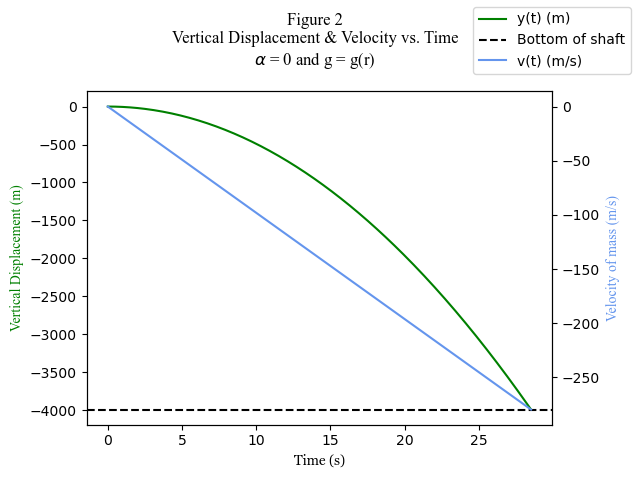

In [6]:
# Define derivatives function 
def new_y_derivatives(t, s):
    y, v = s # m , m/s
    dydt = v # m/s
    d2ydt2 = -g(y) + alpha * np.abs((dydt)**gamma) #m/s^2
    derivs = [dydt, d2ydt2] # m/s, m/s^2
    return derivs

# Using same time span, initial conditions, and event as previous part. 

# Solve ivp 
soln = solve_ivp(fun = new_y_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = bottom)
t = soln.t # seconds 
y = soln.y[0] # m 
v = soln.y[1] # m/s

t_bottom = soln.t_events[0]
print(f"The mass hits the bottom of the shaft at t = {t_bottom[0]} seconds neglecting air resistance and using a variable g(r).")
print("\n")
print(f"Solution:\n {soln}")

fig, ax = plt.subplots()
ax.plot(t, y, color = "green", label = "y(t) (m)")
ax.set_xlabel("Time (s)", fontname = "Georgia")
ax.set_ylabel("Vertical Displacement (m)", color = "green", fontname = "Times New Roman")

ax2 = ax.twinx()
ax2.plot(t, v, color = "cornflowerblue", label = "v(t) (m/s)")
ax2.set_ylabel("Velocity of mass (m/s)", color = "cornflowerblue", fontname = "Times New Roman")

ax.axhline(-4*10**3, color = "black", linestyle = "--", label = "Bottom of shaft")

fig.legend()
fig.suptitle("Figure 2\nVertical Displacement & Velocity vs. Time\n" + r"$\alpha$ = 0 and g = g(r)", fontname = "Times New Roman")
fig.tight_layout()

Incorporating a height-dependent g made the fall time longer: now, the fall to the bottom of the shaft takes 28.55836061 seconds, rather than 28.55686246 seconds. This is because the acceleration will decrease as you get closer to the center of the earth, which means that, when closer to the center of the Earth, the velocity will increase at a slower rate.

We will now add air resistance into our system of differential equations and solve it again. alpha = 0.004 was calibrated by testing a number of values until a terminal velocity of approximately -50 m/s was achieved. 

The mass hits the bottom of the shaft at t = 84.27796653906074 seconds, accounting for air resistance and variable gravitational acceleration g(r).


Solution:
   message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  8.408e+01  8.418e+01]
        y: [[ 0.000e+00 -4.915e-02 ... -3.990e+03 -3.995e+03]
            [ 0.000e+00 -9.819e-01 ... -4.946e+01 -4.946e+01]]
      sol: None
 t_events: [array([ 8.428e+01])]
 y_events: [array([[-4.000e+03, -4.946e+01]])]
     nfev: 128
     njev: 0
      nlu: 0


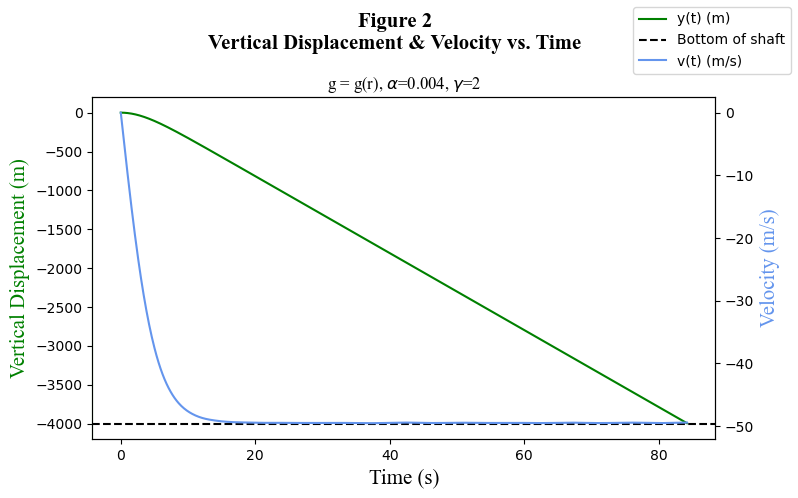

In [7]:
alpha = 0.004

# Using the same initial conditions, time span, event, and derivatives function as before. 
# But this time, we have a different alpha 

# Solve ivp 
soln = solve_ivp(fun = new_y_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = bottom)
t = soln.t # seconds 
y = soln.y[0] # m 
v = soln.y[1] # m/s 

t_bottom = soln.t_events[0]
print(f"The mass hits the bottom of the shaft at t = {t_bottom[0]} seconds, accounting for air resistance and variable gravitational acceleration g(r).")
print("\n")
print(f"Solution:\n {soln}")

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(t, y, color = "green", label = "y(t) (m)")
ax.set_xlabel("Time (s)", fontname = "Times New Roman", fontsize = 15)
ax.set_ylabel("Vertical Displacement (m)", color = "green", fontname = "Times New Roman", fontsize = 15)
ax.spines["left"].set_color("green")

ax2 = ax.twinx()
ax2.plot(t, v, color = "cornflowerblue", label = "v(t) (m/s)")
ax2.set_ylabel("Velocity (m/s)", color = "cornflowerblue", fontname = "Times New Roman", fontsize = 15)
ax.axhline(-4000, color = "black", linestyle = "--", label = "Bottom of shaft")

fig.legend()
fig.suptitle("Figure 2\nVertical Displacement & Velocity vs. Time", fontname = "Times New Roman", fontsize = 15, fontweight = "bold")
ax.set_title(r"g = g(r), $\alpha$=0.004, $\gamma$=2", fontname = "Times New Roman")
fig.tight_layout()

When drag is taken into consideration, the mass hits a terminal velocity and therefore takes a lot longer to hit the bottom of the shaft. It takes t = 84.27871109 seconds to hit the bottom of the shaft, which is nearly triple the time it would take to hit the bottom without air resistance.

The drag coefficient alpha = 0.004 was calibrated with the assumption that the object will reach a terminal velocity of about -50 m/s.

## Part 3: The Coriolis Force

Now, we will consider the additional impact that coriolis forces have on the mass's trajectory. We will use np.solve_ivp to solve a new system of differential equations that factors in the coriolis force. Air resistance is intially neglected.

These calculations are for a shaft with width 5m and depth 4km. The times at which the mass hits the botttom and side of the shaft are recorded. 

In [8]:
def position_derivatives(t, s):
    x, y, vx, vy = s # m, m, m/s, m/s

    dxdt = vx # m/s 
    dydt = vy # m/s 

    dvxdt = (2*w_earth*vy) # m/s^2
    dvydt = (-g(y) + alpha * vy**gamma) - (2*w_earth*vx) #m/s^2
    
    return [dxdt, dydt, dvxdt, dvydt]

In [9]:
 # Define time span 
t0 = 0 # seconds
tf = 100 # seconds 
t_eval = np.linspace(t0, tf, 200) # seconds 

# Define initial conditions
x0, y0 = 0, 0 # m 
vx0, vy0 = 0, 0 # m/s 

ics = [x0, y0, vx0, vy0] #m, m, m/s, m/s

# Define event 
def bottom(t,s):
    return s[1] + 4000 
bottom.terminal = True 

def side(t, s):
    return s[0] + 2.5 

# Solve ivp 
alpha = 0

soln = solve_ivp(fun = position_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = [bottom, side])
t = soln.t # seconds 

x_nodrag = soln.y[0] # m 
y_nodrag = soln.y[1] # m 

vx_nodrag = soln.y[2] # m/s 
vy_nodrag = soln.y[3] # m/s 

print(f"Solution:\n{soln}")

print("\n")

t_bottom = soln.t_events[0][0] # seconds 
print(f"t = {t_bottom} seconds when it hits the bottom.")

t_side = soln.t_events[1][0] #seconds 
print(f"t = {t_side} seconds when it hits the side. y = {soln.y_events[1][0][1]} m")



Solution:
  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  5.025e-01 ...  2.764e+01  2.814e+01]
        y: [[ 0.000e+00 -3.017e-05 ... -5.020e+00 -5.299e+00]
            [ 0.000e+00 -1.239e+00 ... -3.746e+03 -3.884e+03]
            [ 0.000e+00 -1.801e-04 ... -5.449e-01 -5.649e-01]
            [ 0.000e+00 -4.930e+00 ... -2.711e+02 -2.760e+02]]
      sol: None
 t_events: [array([ 2.856e+01]), array([ 2.191e+01])]
 y_events: [array([[-5.538e+00, -4.000e+03, -5.818e-01, -2.801e+02]]), array([[-2.500e+00, -2.354e+03, -3.424e-01, -2.149e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


t = 28.558375882561684 seconds when it hits the bottom.
t = 21.907400286608894 seconds when it hits the side. y = -2353.9303551066196 m


The test mass hits the side of the shaft before it hits the bottom.

Now, we will consider drag:

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.351e+00 ...  8.243e+01  8.378e+01]
        y: [[ 0.000e+00 -5.826e-04 ... -2.247e+01 -2.324e+01]
            [ 0.000e+00 -8.853e+00 ... -3.908e+03 -3.976e+03]
            [ 0.000e+00 -1.288e-03 ... -5.684e-01 -5.782e-01]
            [ 0.000e+00 -1.295e+01 ... -4.955e+01 -4.948e+01]]
      sol: None
 t_events: [array([ 8.428e+01]), array([ 2.968e+01])]
 y_events: [array([[-2.353e+01, -4.000e+03, -5.818e-01, -4.945e+01]]), array([[-2.500e+00, -1.297e+03, -1.886e-01, -4.953e+01]])]
     nfev: 128
     njev: 0
      nlu: 0
t = 84.27701714981481 seconds when it hits the botto
t = 29.6794543957838 seconds when it hits the side. y = -1296.550635508494 m


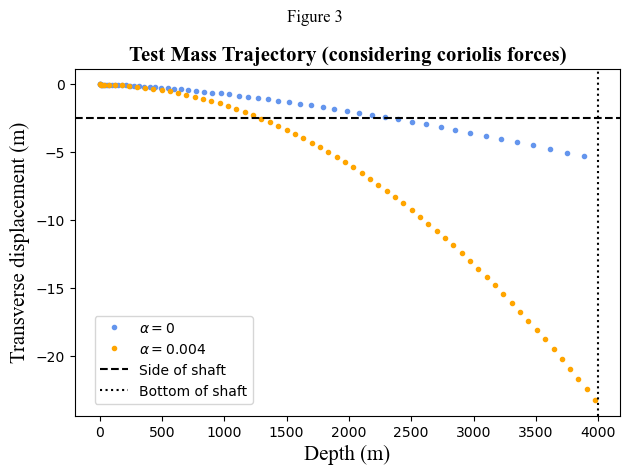

In [10]:
# Define time span 
t0 = 0 # seconds 
tf = 100 # seconds 
t_eval = np.linspace(t0, tf, 75) # seconds

# Define initial conditions
x0, y0 = 0, 0 # m, m 
vx0, vy0 = 0, 0 #m/s, m/s 

ics = [x0, y0, vx0, vy0] # m, m, m/s, m/s 

# Define event 
def bottom(t,s):
    return s[1] + 4000 
bottom.terminal = True 

def side(t, s):
    return s[0] + 2.5 

alpha = 0.004

# Solve ivp 
soln = solve_ivp(fun = position_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = [bottom, side])
t = soln.t #seconds 

x_drag = soln.y[0] #m 
y_drag = soln.y[1] #m 

vx_drag = soln.y[2] #m/s
vy_drag = soln.y[3] #m/s

print(soln)

t_bottom = soln.t_events[0][0] #seconds 
print(f"t = {t_bottom} seconds when it hits the botto")

t_side = soln.t_events[1][0] #seconds
print(f"t = {t_side} seconds when it hits the side. y = {soln.y_events[1][0][1]} m")

fig, ax = plt.subplots()
ax.plot(np.abs(y_nodrag), x_nodrag, color = "cornflowerblue", linestyle = "", marker = ".", label = r"$\alpha = 0$")
ax.plot(np.abs(y_drag), x_drag, color = "orange", linestyle = "", marker = ".", label = r"$\alpha = 0.004$")

ax.set_xlabel("Depth (m)", fontname = "Times New Roman", fontsize = 15)
ax.set_ylabel("Transverse displacement (m)", fontname = "Times New Roman", fontsize = 15)
ax.axhline(-2.5, color = "black", linestyle = "--", label = "Side of shaft")
ax.axvline(4000, color = "black", linestyle = ":", label = "Bottom of shaft")


fig.suptitle("Figure 3", fontsize = 12, fontname = "Times New Roman")
ax.set_title("Test Mass Trajectory (considering coriolis forces)", fontname = "Times New Roman", fontsize = 15, fontweight = "bold")
fig.legend(loc = (0.15, .15))
fig.tight_layout()

In [11]:
print(f"When drag is taken into account, it takes the mass {29.6794543957838-21.907400286608894} seconds longer to hit the side.")

print(f"The mass still hits the side before it hits the bottom of the shaft.")

When drag is taken into account, it takes the mass 7.772054109174906 seconds longer to hit the side.
The mass still hits the side before it hits the bottom of the shaft.


## Part 4: An Infinitely Deep Mine

We will now consider the case of an infinitely deep mine tunneling from one pole of the Earth to the other. Another system of differential equations is defined using g(y) to model gravitational acceleration. Coriolis and drag forces are neglected.

Solution:
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.502e+01 ...  1.498e+04  1.500e+04]
        y: [[ 0.000e+00 -1.106e+03 ... -2.231e+05 -1.931e+05]
            [ 0.000e+00 -1.473e+02 ...  2.074e+03  1.932e+03]]
      sol: None
 t_events: [array([ 1.267e+03,  3.800e+03,  6.333e+03,  8.866e+03,
                   1.140e+04,  1.393e+04]), array([ 2.482e+03,  2.584e+03,  7.548e+03,  7.650e+03,
                   1.261e+04,  1.272e+04])]
 y_events: [array([[-6.378e+06, -7.910e+03],
                  [-6.378e+06,  7.910e+03],
                  [-6.378e+06, -7.910e+03],
                  [-6.378e+06,  7.910e+03],
                  [-6.378e+06, -7.910e+03],
                  [-6.378e+06,  7.910e+03]]), array([[-1.274e+07, -5.000e+02],
                  [-1.274e+07,  5.000e+02],
                  [-1.274e+07, -5.000e+02],
                  [-1.274e+07,  5.000e+02],
                  [-1.274e+07, -5.000

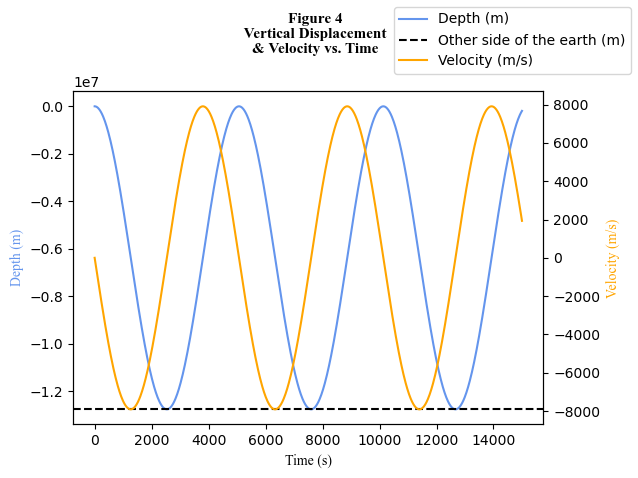

In [12]:
def new_y_derivatives_nodrag(t, s):
    alpha = 0
    y, v = s #m, m/s 
    dydt = v #m/s 
    d2ydt2 = -g(y) + alpha * (dydt)**gamma #m/s^2
    derivs = [dydt, d2ydt2] #m/s, m/s^2
    return derivs


# Define time span 
t0 = 0 # seconds 
tf = 15000 # seconds 
t_eval = np.linspace(t0, tf, 1000) # seconds 

# Define initial conditions 
y0 = 0 #m 
v0 = 0 #m/s
ics = [y0, v0] #m, m/s 

# Define event 
def center(t, s):
    return s[0] + R_earth

def otherside(t, s):
    return s[0] + (0.999*D_earth)

# Solve ivp 
soln = solve_ivp(fun = new_y_derivatives_nodrag, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = [center, otherside], rtol = 1e-10, atol=1e-10)
t = soln.t #seconds
y = soln.y[0] #m
v = soln.y[1] #m/s 

t_center = soln.t_events[0][0] #seconds
t_otherside = soln.t_events[1][0] #seconds 

v_center = soln.y_events[0][0][1] #m/s 
v_otherside = soln.y_events[1][0][1] #m/s 

print(f"Solution:\n{soln}")
print("\n")
print(f"The mass will reach the center of the earth at t = {t_center} seconds at a velocity of v = {v_center} m/s.") 
print("\n")
print(f"The mass will reach the other side of the earth at t = {t_otherside} seconds at a velocity of v = {v_otherside} m/s.")

fig, ax = plt.subplots()
ax.plot(t, y, color = "cornflowerblue", label = "Depth (m)")
ax.set_xlabel("Time (s)",  fontname = "Times New Roman")
ax.set_ylabel("Depth (m)", color = "cornflowerblue",  fontname = "Times New Roman")
ax.axhline(-D_earth, color = "black", linestyle = "--", label = "Other side of the earth (m)")

ax2 = ax.twinx();
ax2.plot(t, v, color = "orange", label = "Velocity (m/s)");
ax2.set_ylabel("Velocity (m/s)", color = "orange",  fontname = "Times New Roman")


fig.suptitle("Figure 4\n Vertical Displacement \n& Velocity vs. Time", fontsize = 11, fontname = "Times New Roman", fontweight = "bold")
fig.legend()
fig.tight_layout()

The mass will oscillate between the two poles of the Earth!

We will compare the crossing time for a uniformly dense Earth to the orbital period of an object orbiting the radius of the Earth. 

In [13]:
v_orbit = np.sqrt(G*M_earth/R_earth) #m/s
T = (2*np.pi*R_earth)/v_orbit #seconds
print(f"The orbital period is {T} seconds")
print("\n")
print(f"The orbital period is {T/(t_otherside)} times longer than the crossing time -- this means that the time it takes for the mass to orbit the earth is approximately equal to the time it takes for the dropped mass to fall through the earth and come back to its initial position.")

The orbital period is 5069.371199675785 seconds


The orbital period is 2.0423343186983747 times longer than the crossing time -- this means that the time it takes for the mass to orbit the earth is approximately equal to the time it takes for the dropped mass to fall through the earth and come back to its initial position.


## Part 5: A Non-Uniform Earth

We will now consider the case of a non-uniform mass distribution within the Earth, requiring us to use a different model for gravitational acceleration. 

In [14]:
from scipy.integrate import quad

We must define a list of coefficients pn to work with for each density distribution corresponding with a different n.

In [15]:
n = 0 
def func(radius):  
    return (radius**2)*(1-(radius/R_earth)**2)**n

n_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
pn_list_earth = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(n_list)):
    pn = M_earth/(4*np.pi*quad(func, 0, R_earth)[0])
    pn_list_earth[i] = pn
    n += 1

print(f"pn = {pn_list_earth}") #now you can index it for whatever n you need



pn = [5494.8674095512, 13737.168523878001, 24040.044916786497, 36060.06737517975, 49582.59264087215, 64457.370433133794, 80571.71304141726, 97837.08012172097, 116181.53264454364, 135545.12141863425]


We will now plot the normalized density distributions for pn = 1.

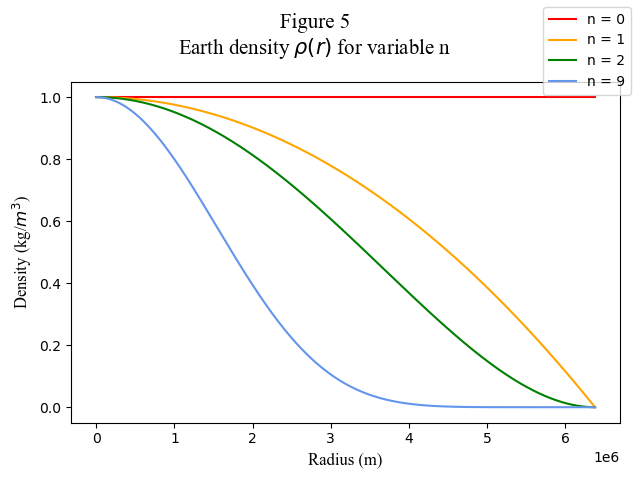

In [16]:
def density_pn1(radius, n):
    # Function where pn = 1
    return  (1 - (radius/R_earth)**2)**n


radius = np.linspace(0, R_earth, 1000) #m

density_n0 = density_pn1(radius, 0)
density_n1 = density_pn1(radius, 1)
density_n2 = density_pn1(radius, 2)
density_n9 = density_pn1(radius, 9)

fig, ax = plt.subplots()
ax.plot(radius, density_n0, color = "red", label = "n = 0")
ax.plot(radius, density_n1, color = "orange", label = "n = 1")
ax.plot(radius, density_n2, color = "green", label = "n = 2")
ax.plot(radius, density_n9, color = "cornflowerblue", label = "n = 9")

ax.set_xlabel("Radius (m)", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel(r"Density (kg/$m^3$)", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Figure 5\n" + r"Earth density $\rho (r)$ for variable n", fontsize = 15, fontname = "Times New Roman")
fig.legend()
fig.tight_layout()

We will now use the pn values that we generated to model gravitational force as a function of radius for density distributions corresponding with n = 0, 1, 2, and 9.

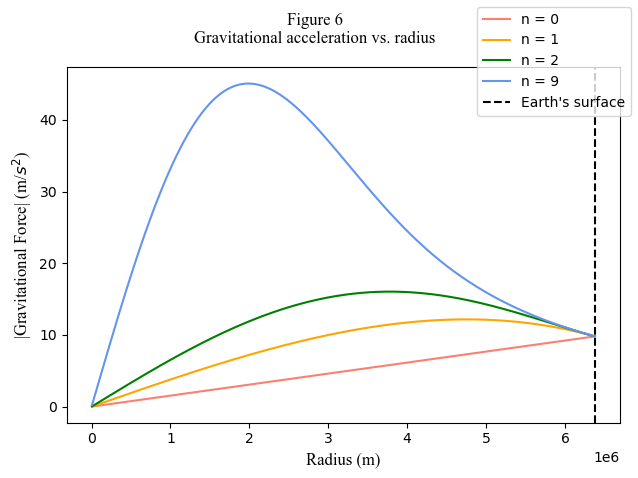

In [17]:
m = 1 #kg
def F_grav(radius, n, pn_list): 
    def func_to_integrate(radius):
        return m*((radius**2) * pn_list[n] * (1 - (radius/R_earth)**2)**n)

    F = np.zeros(len(radius))

    for i in range(len(radius)):
        F[i] = (1/radius[i]**2)*G*4*np.pi * quad(func_to_integrate, 0, radius[i])[0]
    
    return F

radius = np.linspace(0, R_earth, 1000)[1:] #m 

F_grav_n0 = F_grav(radius, 0, pn_list_earth)
F_grav_n1 = F_grav(radius, 1, pn_list_earth)
F_grav_n2 = F_grav(radius, 2, pn_list_earth)
F_grav_n9 = F_grav(radius, 9, pn_list_earth)


fig, ax = plt.subplots()
ax.plot(radius, F_grav_n0, color = "salmon", label = "n = 0")
ax.plot(radius, F_grav_n1, color = "orange", label = "n = 1")
ax.plot(radius, F_grav_n2, color = "green", label = "n = 2")
ax.plot(radius, F_grav_n9, color = "cornflowerblue", label = "n = 9")
ax.axvline(R_earth, color = "black", linestyle = "--", label = "Earth's surface")

ax.set_xlabel("Radius (m)", fontname = "Times New Roman", fontsize = 12)
ax.set_ylabel(r"|Gravitational Force| (m/$s^2$)", fontname = "Times New Roman", fontsize = 12)
fig.legend()
fig.suptitle("Figure 6\nGravitational acceleration vs. radius", fontname = "Times New Roman", fontsize = 12)
fig.tight_layout()

We will use the computed gravitational acceleration to create a new system of differential equations that models the trajectory of a mass traversing an infinitely deep shaft for different density distributions. This system is solved using np.solve_ivp for n = 0, 1, 2, and 9. The crossing times are calculated for each case. 

In [18]:
def y_derivatives_nonuniform_earth(t, s):
    y, v = s #m, m/s
    
    dydt = v #m/s 

    radius = R_earth - np.abs(y) #m 

    def func_to_integrate(r):
        return (r**2) * pn_list_earth[n] * (1 - (r/R_earth)**2)**n
        
    a = (1/radius**2)*G*4*np.pi * quad(func_to_integrate, 0, radius)[0]

    
    d2ydt2 = -a #m/s^2
    
    derivs = [dydt, d2ydt2] #m/s, m/s^2
    return derivs

In [19]:
t0 = 0 #seconds 
tf = 8000 #seconds 
t_eval = np.linspace(t0, tf, 1000) #seconds 

# Define initial conditions 
y0 = 0 #m 
v0 = 0 #m/s
ics = [y0, v0]

# Define event 
def center(t, s):
    return s[0] + R_earth

def otherside(t, s):
    return s[0] + (0.999*D_earth)


n = 0


The mass will reach the center of the earth at t = 1267.3427359277791 seconds at a velocity of v = -7905.275739934917 m/s


The mass will reach the other side of the earth at t = 7553.042605325259 seconds at a velocity of v = -499.5029436335559 m/s
________________________________________________________________________________________________________________________
n = 1


The mass will reach the center of the earth at t = 1096.512646067594 seconds at a velocity of v = -10457.70051710271 m/s


The mass will reach the other side of the earth at t = 2142.029155945628 seconds at a velocity of v = -500.32245815911006 m/s
________________________________________________________________________________________________________________________
n = 2


The mass will reach the center of the earth at t = 1035.0755281406782 seconds at a velocity of v = -12182.849276019377 m/s


The mass will reach the other side of the earth at t = 2019.1536187856495 seconds at a velocity of v = -500.334

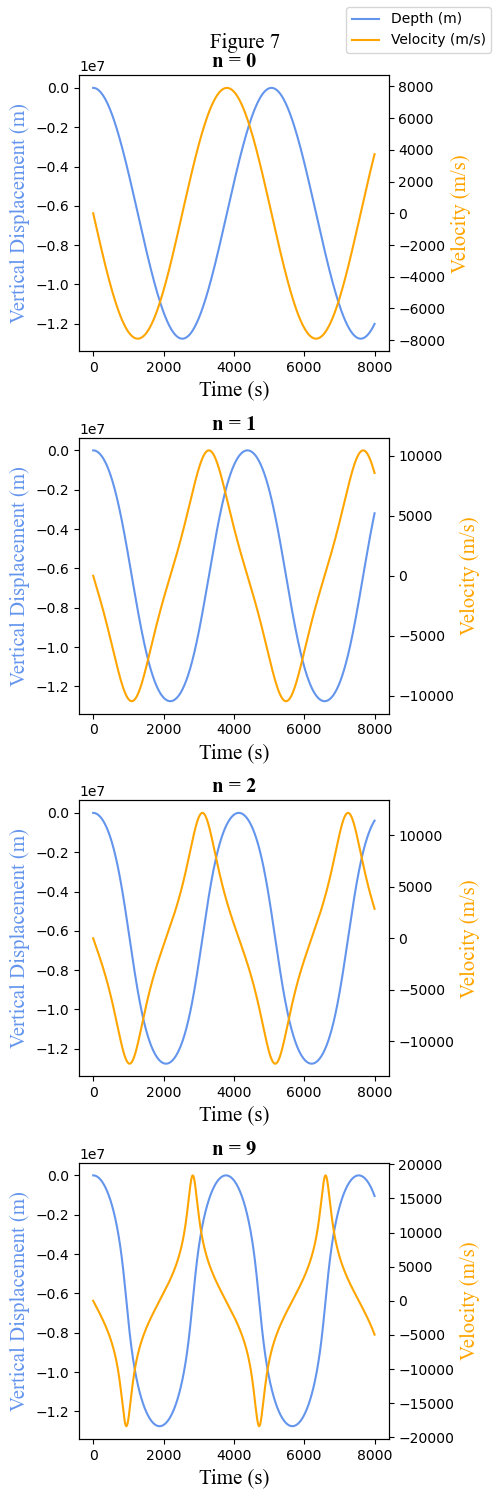

In [20]:
n = 0

n_to_plot = [0, 1, 2, 9]

fig, ax = plt.subplots(4, 1, figsize = (5, 15))

for i in range(len(n_to_plot)):
    n = n_to_plot[i]

    # Solve ivp 
    soln = solve_ivp(fun = y_derivatives_nonuniform_earth, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = [center, otherside], rtol = 1e-6, atol=1e-8)
    
    t = soln.t #seconds 
    y = soln.y[0] #m
    v = soln.y[1] #m/s

    t_center = soln.t_events[0][0] #seconds
    t_otherside = soln.t_events[1][0] #seconds 

    v_center = soln.y_events[0][0][1] #m/s
    v_otherside = soln.y_events[1][0][1] #m/s

    print(f"n = {n}")
    print("\n")
    print(f"The mass will reach the center of the earth at t = {t_center} seconds at a velocity of v = {v_center} m/s") 
    print("\n")
    print(f"The mass will reach the other side of the earth at t = {t_otherside} seconds at a velocity of v = {v_otherside} m/s")
    print("________________________________________________________________________________________________________________________")


    depth_plot, = ax[i].plot(t, y, color = "cornflowerblue", label = "Depth (m)")
    
    ax[i].set_ylabel("Vertical Displacement (m)", color = "cornflowerblue", fontname = "Times New Roman", fontsize = 15)
    ax[i].set_title(f"n = {n}", fontname = "Times New Roman", fontsize = 15, fontweight = "bold")
    ax[i].set_xlabel("Time (s)", fontname = "Times New Roman", fontsize = 15)
   

    ax2 = ax[i].twinx()

    velocity_plot, = ax2.plot(t, v, color = "orange", label = "Velocity (m/s)")
    ax2.set_ylabel("Velocity (m/s)", color = "orange", font = "Times New Roman", fontsize = 15)

fig.legend(handles = [depth_plot, velocity_plot])
# FIGURE OUT HOW TO DO MULTIPLE HANDLES
#fig.suptitle("Figure 7\n\n", fontname = "Times New Roman")
#fig.suptitle("\nFigure 7\nVertical Displacement & Velocity vs. Time", fontname = "Times New Roman")
fig.suptitle("Figure 7", fontname = "Times New Roman", fontsize = 15)
fig.tight_layout()

## Part 6: A Lunar Mine Shaft

We will now use the same procedure as before to calculate the crossing time for an object falling through the Moon.

First, we will define our pn for each n.

In [21]:
n = 0
def func(y):
    r = np.abs(y) # We want the depth here, absolute value 
    return (r**2)*(1-(r/R_moon)**2)**n

n_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
pn_list_moon = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(n_list)):
    pn = (M_moon)/(4*np.pi*quad(func, 0, R_moon)[0])
    pn_list_moon[i] = pn
    n += 1

print(pn_list_moon) #now you can index it for whatever n you need

[3341.7538038703174, 8354.384509675792, 14620.172891932642, 21930.259337898962, 30154.106589611063, 39200.338566494385, 49000.42320811798, 59500.51389557184, 70656.86025099155, 82433.00362615683]


Now, we will set up and solve a system of differential equations modeling the trajectory of our test mass through the Moon.

In [22]:
def y_derivatives_nonuniform_moon(t, s):
    y, v = s #m, m/s
    
    dydt = v #m/s 

    radius = R_moon - np.abs(y) #m 

    def func_to_integrate(r):
        return (r**2) * pn_list_moon[n] * (1 - (r/R_moon)**2)**n
        
    a = (1/radius**2)*G*4*np.pi * quad(func_to_integrate, 0, radius)[0]

    
    d2ydt2 = -a #m/s^2
    
    derivs = [dydt, d2ydt2] #m/s, m/s^2
    return derivs

In [23]:
t0 = 0 #seconds
tf = 30000 #seconds 
t_eval = np.linspace(t0, tf, 1000) #seconds 

# Define initial conditions 
y0 = 0 #m 
v0 = 0 #m/s
ics = [y0, v0] #m, m/s 

# Define event 
def center(t, s):
    return s[0] + R_moon
#center.terminal = True

def otherside(t, s):
    return s[0] + 0.999*(2*R_moon)

In [24]:
n = 0

# Solve ivp 
soln = solve_ivp(fun = y_derivatives_nonuniform_moon, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = [center, otherside], rtol = 1e-6, atol=1e-8)
    
t = soln.t #seconds 
y = soln.y[0] #m 
v = soln.y[1] #m/s 

print(soln)

t_center = soln.t_events[0][0] #seconds

v_center = soln.y_events[0][0][1] #seconds 

t_otherside = soln.t_events[1][0] #seconds 

print(f"n = {n}")
print("\n")
print(f"The mass will reach the center of the moon at t = {t_center} seconds at a velocity of v = {v_center} m/s") 
print("\n")
print(f"The mass will reach the other side of the moon at t = {t_otherside} seconds")

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.003e+01 ...  2.997e+04  3.000e+04]
        y: [[ 0.000e+00 -7.321e+02 ... -3.074e+06 -3.042e+06]
            [ 0.000e+00 -4.876e+01 ...  1.074e+03  1.111e+03]]
      sol: None
 t_events: [array([ 1.625e+03,  4.875e+03,  8.126e+03,  1.138e+04,
                   1.463e+04,  1.788e+04,  2.113e+04,  2.438e+04,
                   2.763e+04]), array([ 9.685e+03,  9.816e+03,  1.619e+04,  1.632e+04,
                   2.269e+04,  2.282e+04,  2.919e+04,  2.932e+04])]
 y_events: [array([[-1.738e+06, -1.680e+03],
                  [-1.738e+06,  1.680e+03],
                  ...,
                  [-1.738e+06,  1.680e+03],
                  [-1.738e+06, -1.680e+03]]), array([[-3.473e+06, -1.062e+02],
                  [-3.473e+06,  1.062e+02],
                  ...,
                  [-3.473e+06, -1.061e+02],
                  [-3.473e+06,  1.061e+02]])]
     nfev

We will now compare the density of the Earth and Moon to gain insight on the connection between crossing time and density.

In [25]:
def density(r, n, pn_list):
    return pn_list[n] * (1 - (r/R_moon)**2)**n

density_moon_const = density(R_moon, 0, pn_list_moon) #kg/m^3

density_earth_const = density(R_earth, 0, pn_list_earth) #kg/m^3

print(f"The moon's density is {density_moon_const} kg/m^3 and the earth's density is {density_earth_const} kg/m^3")
print(f"The earth is {density_earth_const/density_moon_const} times as dense than the moon")

The moon's density is 3341.7538038703174 kg/m^3 and the earth's density is 5494.8674095512 kg/m^3
The earth is 1.644306472603461 times as dense than the moon


Since orbital period is related to the host planet's density via the equation $$T = \sqrt{3\pi /G\rho}$$ we can conclude that crossing time is inversely proportional to the square root of the host planet's density. The ratio of two planets' orbit/crossing times depends on their density ratio via the relationship $$\frac{t_1}{t_2} = \sqrt{\frac{\rho_2}{\rho_1}}$$ with t representing the crossing time and p representing the density of a uniformly dense planet. This means that, for a homogenous planet, planetary density is the sole factor that dictates crossing time.

In [26]:
print(f"Sqrt(1/density ratio) = {1/np.sqrt(density_earth_const/density_moon_const)}")
print(f"Earth crossing time / moon crossing time = {7553.042605327622/9685.305215561038}")
print(f"\nThese two values are approximately equivalent, confirming this relationship")

Sqrt(1/density ratio) = 0.7798455832735046
Earth crossing time / moon crossing time = 0.7798455946635956

These two values are approximately equivalent, confirming this relationship
